In [1]:
%load_ext autoreload
#from coffea import util, processor
from msdprocessor import msdProcessor
from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema
import json
import distributed
import dask
import awkward as ak
import hist
import matplotlib.pyplot as plt
import dask_awkward

/uscms/home/nyabando/nobackup/miniconda3/envs/fastjet/lib/python3.12/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


In [2]:
fileset = "/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/QCD_Pt470to600.root"

In [3]:
events = NanoEventsFactory.from_root(
    {fileset: "/Events"},
    #permit_dask=True,
    schemaclass=PFNanoAODSchema
).events()

In [4]:
dask_awkward.num(events, axis=0).compute()

92000

In [5]:
result = msdProcessor().process(events)

In [6]:
compute=dask.compute(result)[0]

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [7]:
h = compute['ExampleHistogram']
h

Hist(
  Regular(15, 450, 1200, name='pt', label='Jet $p_{T}$ [GeV]'),
  Regular(12, -6, 6, name='eta', label='Jet eta'),
  Regular(36, 0, 252, name='msoftdrop', label='Jet msoftdrop'),
  Regular(10, 0, 1, name='n2', label='Jet n2'),
  storage=Weight()) # Sum: WeightedSum(value=85344, variance=85344) (WeightedSum(value=87635, variance=87635) with flow)

In [8]:
print(h.axes)

(Regular(15, 450, 1200, name='pt', label='Jet $p_{T}$ [GeV]'), Regular(12, -6, 6, name='eta', label='Jet eta'), Regular(36, 0, 252, name='msoftdrop', label='Jet msoftdrop'), Regular(10, 0, 1, name='n2', label='Jet n2'))


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7faa94bb59a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

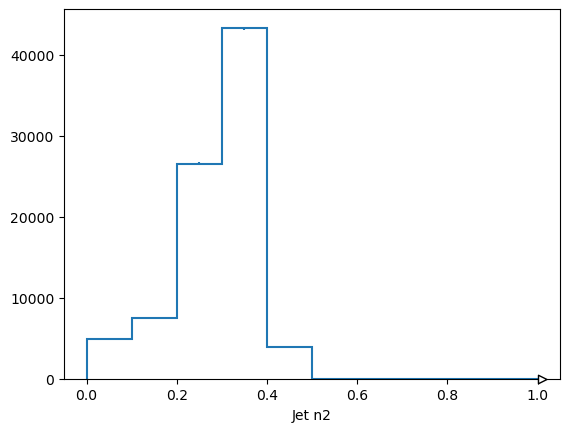

In [9]:
h[{'eta':sum, 'pt':sum, 'msoftdrop':sum}].plot1d()
# This sums over eta and pT and draws msoftdrop

In [10]:
h[{'msoftdrop':sum, 'pt':sum}].plot1d()
# This sums over msoftdrop and pT and draws eta

ValueError: not enough values to unpack (expected 1, got 0)

In [ ]:
h[{'msoftdrop':sum, 'eta':sum}].plot1d()
# This sums over eta and msoftdrop and draws pT

In [ ]:
# msoftdrop_hist = h.integrate('pt').integrate('eta')

In [ ]:
# msoftdrop_hist.plot1d(label='Jet msoftdrop')

In [ ]:
h[{'pt':sum}].plot1d()
#sum pt and plot jet eta

In [ ]:
h[{'eta':sum, 'pt':sum}].plot1d()
#sum pt and plot jet eta

In [ ]:
compute=dask.compute(result)

In [ ]:
# result['pt'].plot1d(overlay='wc')
# plt.yscale('log')
# #plt.ylim(1e-4, 1000)

# plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
result['pt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
#events = NanoEventsFactory.from_root(
#   {fileset:"Events"},
    #permit_dask=True,
 #   schemaclass=PFNanoAODSchema
#).events()

In [ ]:
#autoreload forces the kernel to reload the processor to include any new changes
%autoreload 2
#import msdprocessor

import time
tstart = time.time()

#Run Coffea code using uproot
#output = processor.run_uproot_job(
#    fileset,
#    "Events",
#    msdprocessor.msdprocessor(isMC=True),
#    processor.iterative_executor,
#    executor_args={'schema': NanoAODSchema,'workers': 4},
#    chunksize=10000,
#    maxchunks=1,
#)



In [ ]:
elapsed = time.time() - tstart
print("Total time: %.1f seconds"%elapsed)

In [ ]:
#result = msdprocessor().process(events)

In [ ]:
events['q1pt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['q2pt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['hpt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['detaqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['dphiqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['mqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));